In [1]:
import sys
import sklearn
import numpy as np
import os
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
# iris 데이터를 clustring으로 분류하기

from sklearn.datasets import load_iris

data = load_iris()
X = data.data
y = data.target

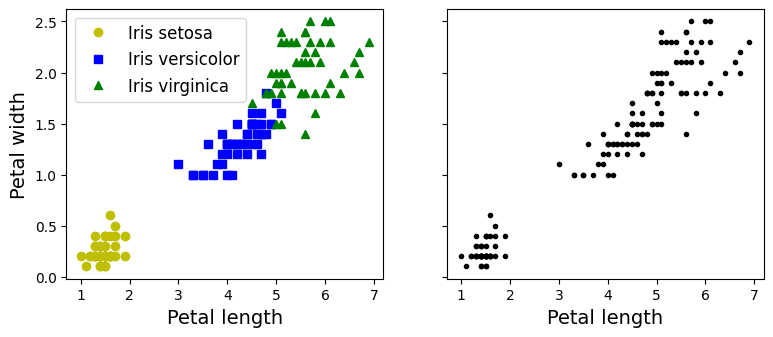

In [3]:
plt.figure(figsize=(9, 3.5))

plt.subplot(121)
plt.plot(X[y==0, 2], X[y==0, 3], "yo", label="Iris setosa")
plt.plot(X[y==1, 2], X[y==1, 3], "bs", label="Iris versicolor")
plt.plot(X[y==2, 2], X[y==2, 3], "g^", label="Iris virginica")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(fontsize=12)

plt.subplot(122)
plt.scatter(X[:, 2], X[:, 3], c="k", marker=".")
plt.xlabel("Petal length", fontsize=14)
plt.tick_params(labelleft=False)
plt.show()

꽃잎의 길이와 너비에 해당하는 데이터만 가지고는 iris데이터를 3개의 클러스터로 분류할 수 없다.

하지만 사용하지 않은 꽃받침의 길이와 너비 정보를 추가하여 가우시안 혼합 모델을 사용하면 iris데이터를 잘 군집화 할 수 있다.

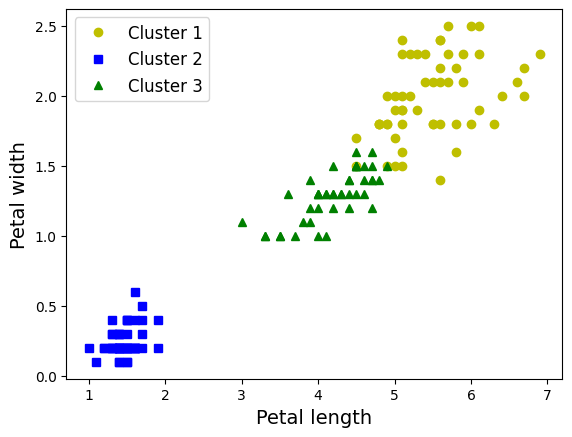

In [4]:
# 가우시안 혼합 모델로 군힙화하기

from sklearn.mixture import GaussianMixture

y_pred = GaussianMixture(n_components=3, random_state=42).fit(X).predict(X)

plt.plot(X[y_pred==0, 2], X[y_pred==0, 3], "yo", label="Cluster 1")
plt.plot(X[y_pred==1, 2], X[y_pred==1, 3], "bs", label="Cluster 2")
plt.plot(X[y_pred==2, 2], X[y_pred==2, 3], "g^", label="Cluster 3")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=12)
plt.show()

In [5]:
# make_blobs로 클러스터가 5개인 데이터 생성

from sklearn.datasets import make_blobs

blob_centers = np.array(
    [[ 0.2,  2.3],
     [-1.5 ,  2.3],
     [-2.8,  1.8],
     [-2.8,  2.8],
     [-2.8,  1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])

X, y = make_blobs(n_samples=2000, centers=blob_centers, cluster_std=blob_std, random_state=42)

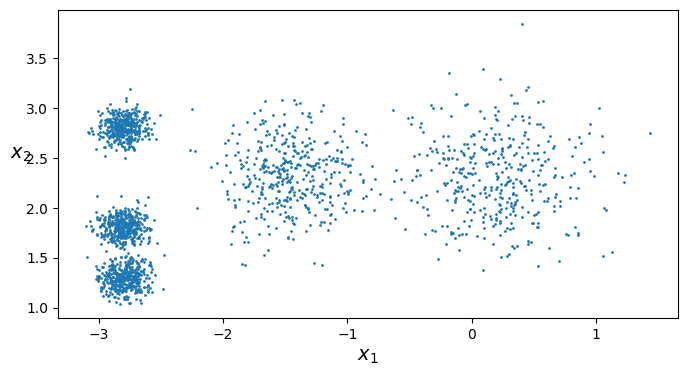

In [6]:
def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)
    
plt.figure(figsize=(8, 4))
plot_clusters(X)
plt.show()

In [7]:
# k-mean으로 주어진 데이터 군집화

from sklearn.cluster import KMeans

k = 5
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
y_pred = kmeans.fit_predict(X)

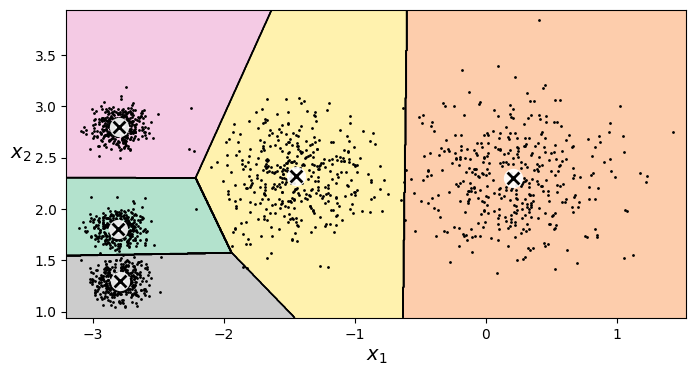

In [8]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=35, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=12, 
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0, labelpad=10)
    else:
        plt.tick_params(labelleft=False)
        
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X)
plt.show()

In [9]:
# 전통적인 k-mean 알고리즘으로 학습

kmeans_iter1 = KMeans(n_clusters=5, init="random", n_init=1,
                      algorithm="lloyd", max_iter=1, random_state=42)
kmeans_iter2 = KMeans(n_clusters=5, init="random", n_init=1,
                      algorithm="lloyd", max_iter=2, random_state=42)
kmeans_iter3 = KMeans(n_clusters=5, init="random", n_init=1,
                      algorithm="lloyd", max_iter=3, random_state=42)
kmeans_iter1.fit(X)
kmeans_iter2.fit(X)
kmeans_iter3.fit(X)

KMeans(init='random', max_iter=3, n_clusters=5, n_init=1, random_state=42)

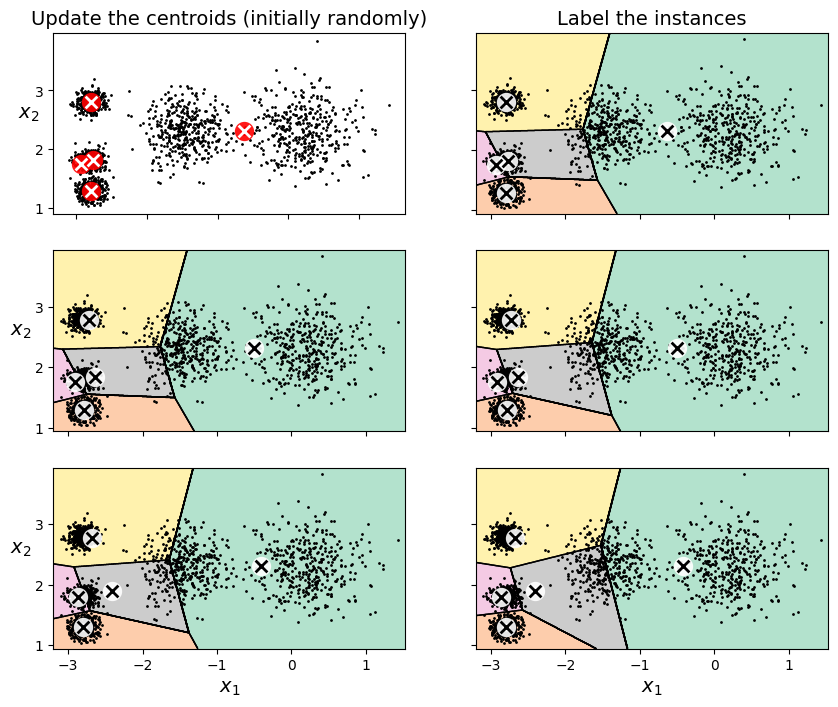

In [10]:
plt.figure(figsize=(10, 8))

plt.subplot(321)
plot_data(X)
plot_centroids(kmeans_iter1.cluster_centers_, circle_color='r', cross_color='w')
plt.ylabel("$x_2$", fontsize=14, rotation=0)
plt.tick_params(labelbottom=False)
plt.title("Update the centroids (initially randomly)", fontsize=14)

plt.subplot(322)
plot_decision_boundaries(kmeans_iter1, X, show_xlabels=False, show_ylabels=False)
plt.title("Label the instances", fontsize=14)

plt.subplot(323)
plot_decision_boundaries(kmeans_iter1, X, show_centroids=False, show_xlabels=False)
plot_centroids(kmeans_iter2.cluster_centers_)

plt.subplot(324)
plot_decision_boundaries(kmeans_iter2, X, show_xlabels=False, show_ylabels=False)

plt.subplot(325)
plot_decision_boundaries(kmeans_iter2, X, show_centroids=False)
plot_centroids(kmeans_iter3.cluster_centers_)

plt.subplot(326)
plot_decision_boundaries(kmeans_iter3, X, show_ylabels=False)

plt.show()

초기 클러스터 중심 선택을 random으로 하고 알고리즘은 lloyd로 하여 전통적인 k-mean을 실행햐였다.

위 그래프는 전통적인 k-mean알고리즘을 각각 1번 2번 3번 반복했을 때 변화를 시각화한 것이다.

처음에 4개의 클러스터가 왼쪽으로 몰렸고 하나의 클러스터만 오른쪽으로 선택 되었다.

학습을 진행 할수록 오른쪽의 클러스터의 중심은 제일 오른쪽 군집으로 접근하는 것을 볼 수 있고 붙어 있었던 4개의 클러스터도 조금씩 떨어지는 것을 볼 수 있다.

원래 K-mean 알고리즘에서는 클러스터의 중심이 랜덤하게 초기화되고, 알고리즘을 반복하여 클러스터의 중심을 개선한다.

하지만 이 방식의 문제점은 K-mean을 실행 할 때 마다 다른 랜덤 시드로 실행 된다면 매우 다른 결과를 얻게된다는 것이다.

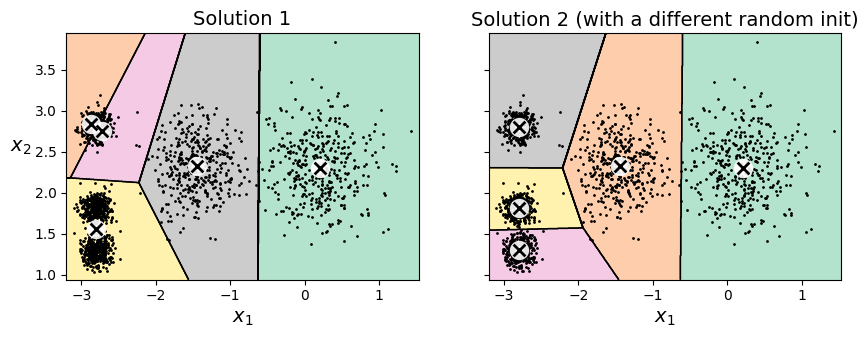

In [11]:
def plot_clusterer_comparison(clusterer1, clusterer2, X, title1, title2):
    clusterer1.fit(X)
    clusterer2.fit(X)

    plt.figure(figsize=(10, 3.2))

    plt.subplot(121)
    plot_decision_boundaries(clusterer1, X)
    plt.title(title1, fontsize=14)

    plt.subplot(122)
    plot_decision_boundaries(clusterer2, X, show_ylabels=False)
    plt.title(title2, fontsize=14)
        
kmeans_rnd_init1 = KMeans(n_clusters=5, init="random", n_init=1, algorithm="lloyd")
kmeans_rnd_init2 = KMeans(n_clusters=5, init="random", n_init=1, algorithm="lloyd")

plot_clusterer_comparison(kmeans_rnd_init1, kmeans_rnd_init2, X,
                          "Solution 1", "Solution 2 (with a different random init)")
plt.show()

군집은 비지도 학습이기 때문에 정답 레이블이 없다.

따라서 최선의 모델을 선택하려면 K-mean 모델의 성능을 평가할 방법이 있어야 한다. 

따라서 각 샘플과 클러스터 중심 사이의 제곱 거리의 합인 이너셔를 성능지표로 사용해 평가한다.

In [12]:
kmeans.inertia_

213.42177131258907

score의 경우 사이킷런에서 큰 값을 항상 최적값으로 여김으로 이너셔는 값이 작을 수록 잘 훈련되었음을 나타냄으로 음수의 값이 나온다.

In [13]:
kmeans.score(X)

-213.42177131258907

클러스터 중심을 랜덤하게 결정하는 것은 위에서 본 결과처럼 한쪽으로 초기값이 뭉쳐있어 좋지 않은 모양으로 수렴할 가능성이 높다.

따라서 k-mean++라는 방식으로 초기화를 해주면 최적의 솔루션으로 수렴할 가능성이 높아진다.

k-mean++방식은 먼저 하나의 클러스터 중심을 무작위로 고른다.

그 후 해당 지점에서 멀리 떨어진 샘플을 다음 클러스터의 중심으로 택할 확률을 높여 초기 클러스터의 중심이 붙어있지 않게 하는 방식으로 나머지 클러스터들을 계속 고른다.

In [14]:
kmeans = KMeans(n_clusters=5, init="k-means++", n_init=1)
kmeans.fit(X)
kmeans.inertia_

226.45443592480856

In [15]:
kmeans = KMeans(n_clusters=5, init="random", n_init=1)
kmeans.fit(X)
kmeans.inertia_

213.42177131258907

k-mean알고리즘은 불필요한 거리 계산을 피하는 방식으로 속도를 높일 수 있다.

대표적으로 Elkan의 k-mean알고리즘 방식이 있는데 이는 거리 계산을 최적화 하여 계산 비중을 줄이는 방식이다.

이는 삼각 부등식을 사용하고, 샘플과 클러스터 중심 사이 거리의 최솟값과 최댓값을 계산하여 각 데이터가 어떤 클러스터에 속할 가능성이 있는지 사전에 추정한다.

In [16]:
%timeit -n 50 KMeans(algorithm="elkan", n_init=10, random_state=42).fit(X)

64.4 ms ± 3.19 ms per loop (mean ± std. dev. of 7 runs, 50 loops each)


In [17]:
# 미니배치를 이용해서 k-mean알고리즘 사용하기

from sklearn.cluster import MiniBatchKMeans

minibatch_kmeans = MiniBatchKMeans(n_clusters=5, random_state=42, n_init=3)
minibatch_kmeans.fit(X)

minibatch_kmeans.inertia_

231.37642313963232

In [18]:
%timeit -n 50 MiniBatchKMeans(n_clusters=5, random_state=42, n_init=3).fit(X)

14.3 ms ± 453 µs per loop (mean ± std. dev. of 7 runs, 50 loops each)


미니배치 방식의 경우 일반적인 k-mean방식에 비해 매우 빠른것을 볼 수 있다.

하지만 이너셔는 조금 더 안좋은 것을 볼 수 있다.

클러스터의 수가 증가할 수록 두 알고리즘사이의 차이가 더 커지는데 아래의 코드를 통해 그래프로 시각화를 하였다.

이를 보면 이너셔는 조금이지만 미니배치가 더 큰 것을 볼 수 있고, 훈련시간은 클러스터가 커질수록 차이가 더 커지는것을 볼 수 있다.

In [19]:
from timeit import timeit

times = np.empty((100, 2))
inertias = np.empty((100, 2))
for k in range(1, 101):
    kmeans_ = KMeans(n_clusters=k, random_state=42, n_init=10)
    minibatch_kmeans = MiniBatchKMeans(n_clusters=k, random_state=42, n_init=3)
    print("\r{}/{}".format(k, 100), end="")
    times[k-1, 0] = timeit("kmeans_.fit(X)", number=10, globals=globals())
    times[k-1, 1]  = timeit("minibatch_kmeans.fit(X)", number=10, globals=globals())
    inertias[k-1, 0] = kmeans_.inertia_
    inertias[k-1, 1] = minibatch_kmeans.inertia_

100/100

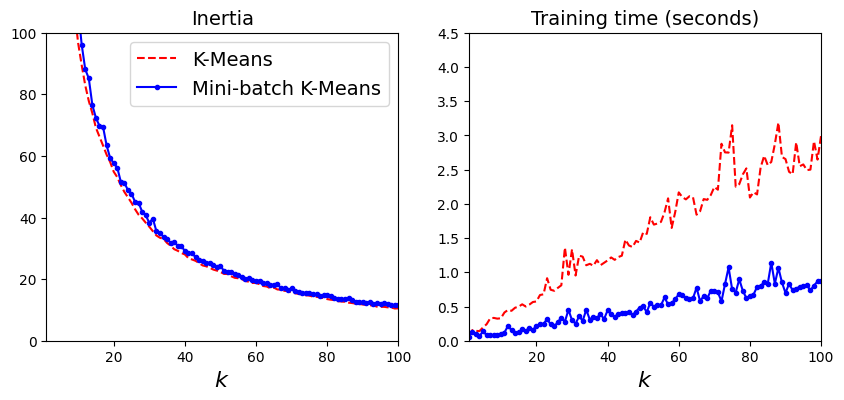

In [20]:
plt.figure(figsize=(10,4))

plt.subplot(121)
plt.plot(range(1, 101), inertias[:, 0], "r--", label="K-Means")
plt.plot(range(1, 101), inertias[:, 1], "b.-", label="Mini-batch K-Means")
plt.xlabel("$k$", fontsize=16)
plt.title("Inertia", fontsize=14)
plt.legend(fontsize=14)
plt.axis([1, 100, 0, 100])

plt.subplot(122)
plt.plot(range(1, 101), times[:, 0], "r--", label="K-Means")
plt.plot(range(1, 101), times[:, 1], "b.-", label="Mini-batch K-Means")
plt.xlabel("$k$", fontsize=16)
plt.title("Training time (seconds)", fontsize=14)
plt.axis([1, 100, 0, 4.5])

plt.show()

In [21]:
# memmap을 사용해 메모리 부족 해결

import urllib.request
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

mnist = fetch_openml('mnist_784', version=1, parser="auto")
mnist.target = mnist.target.astype(np.int64)

X_train, X_test, y_train, y_test = train_test_split(mnist["data"], mnist["target"], random_state=42)

In [22]:
filename = "my_mnist.data"
X_mm = np.memmap(filename, dtype='float32', mode='write', shape=X_train.shape)
X_mm[:] = X_train

In [23]:
del X_mm

In [24]:
# 저장된 메모리를 이용해 매핑을 하여 훈련 데이터를 학습하였다

X_mm = np.memmap(filename, dtype="float32", mode="readonly", shape=X_train.shape)

minibatch_kmeans = MiniBatchKMeans(n_clusters=10, batch_size=10, random_state=42, n_init=3)
minibatch_kmeans.fit(X_mm)

MiniBatchKMeans(batch_size=10, n_clusters=10, n_init=3, random_state=42)

데이터가 너무 커서 memmap도 사용할 수 없다면 한 번에 하나의 배치를 모델에 주입하여 훈련해야한다.

그리고 여러 번 초기화를 수행하고 이너셔가 가장 낮은 모델을 선택한다.

In [25]:
def load_next_batch(batch_size):
    return X[np.random.choice(len(X), batch_size, replace=False)]

In [26]:
k = 5
n_init = 10
n_iterations = 100
batch_size = 100
init_size = 500  
evaluate_on_last_n_iters = 10

best_kmeans = None

for init in range(n_init):
    minibatch_kmeans = MiniBatchKMeans(n_clusters=k, init_size=init_size, n_init=3)
    X_init = load_next_batch(init_size)
    minibatch_kmeans.partial_fit(X_init)

    minibatch_kmeans.sum_inertia_ = 0
    for iteration in range(n_iterations):
        X_batch = load_next_batch(batch_size)
        minibatch_kmeans.partial_fit(X_batch)
        if iteration >= n_iterations - evaluate_on_last_n_iters:
            minibatch_kmeans.sum_inertia_ += minibatch_kmeans.inertia_

    if (best_kmeans is None or
        minibatch_kmeans.sum_inertia_ < best_kmeans.sum_inertia_):
        best_kmeans = minibatch_kmeans

In [27]:
best_kmeans.score(X)

-213.52657266956024

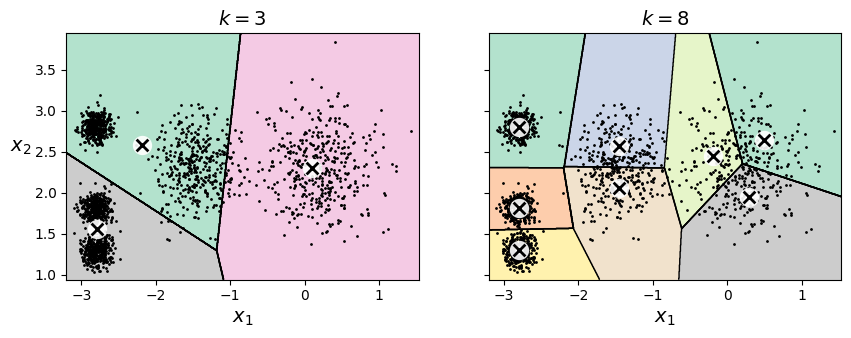

In [28]:
# 적절하지 않은 클러스터 갯수로 알고리즘 적용

kmeans_k3 = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans_k8 = KMeans(n_clusters=8, random_state=42, n_init=10)

plot_clusterer_comparison(kmeans_k3, kmeans_k8, X, "$k=3$", "$k=8$")
plt.show()

In [29]:
kmeans_k3.inertia_

662.948074483483

In [30]:
kmeans_k8.inertia_

122.21250397544878

클러스터의 수가 증가할수록 이너셔는 항상 줄어들기 때문에 단순히 이너셔의 크기로 클러스터의 수를 결정하면 안된다.

따라서 클러스터의 수에 대한 이너셔를 그래프를 통해 비교하여 적절한 k값을 정해야한다.

In [31]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42, n_init=10).fit(X) for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

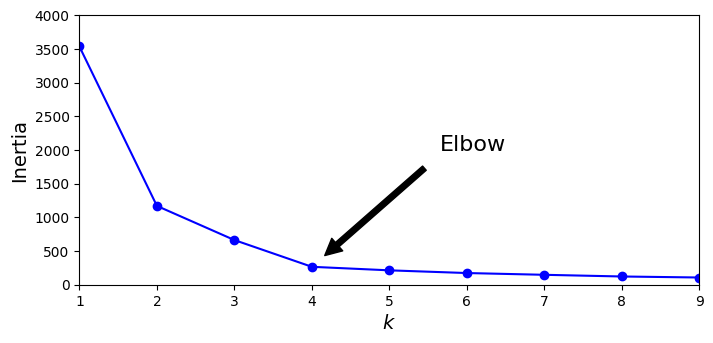

In [32]:
plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.annotate('Elbow',
             xy=(4, inertias[3]),
             xytext=(0.55, 0.55),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.axis([1, 9, 0, 4000])
plt.show()

위의 그래프를 보면 클러스터의 수가 4개일때 변곡점이 생기는 것을 볼 수 있다.

따라서 이 값보다 클러스터의 수가 작으면 군집화가 제대로 안된다는 뜻이고, 많아도 큰 차이가 없고 시간만 오래 걸린다는 뜻이다.

### 실루엣 점수

위의 경우에 실제 최적의 클러스터의 수는 5인데 그래프를 통해 변곡점으로 구하는 방법은 이처럼 오차가 있을수도 있고 그래프를 사람이 보고 적절한 값을 찾아줘야하는 단점이 있다.

이러한 문제 때문에 보다 더 정확한 방법을 사용하려면 실루엣 점수를 활용하여 구하면 된다.

실루엣 점수는 모든 샘플에 대한 실루엣 계수의 평균을 의미한다.

한 샘플의 실루엣 계수는 $\frac{(b - a)}{\max(a, b)}$인데, 여기에서 a는 같은 클러스터에 있는 다른 샘플까지의 평균 거리이고, b는 가장 가까운 클러스터까지 평균 거리이다.

실루엣 계수는 -1에서 1 사이 값을 가지는데, 1에 가까울수록 군집화가 잘 되었다는 것이고, 0에 가까우면 클러스터 경계에 가깝다는 뜻이다.

그리고 -1에 가까우면 샘플이 잘못된 분류되었다는 뜻이다.

In [33]:
from sklearn.metrics import silhouette_score

silhouette_scores = [silhouette_score(X, model.labels_) for model in kmeans_per_k[1:]]

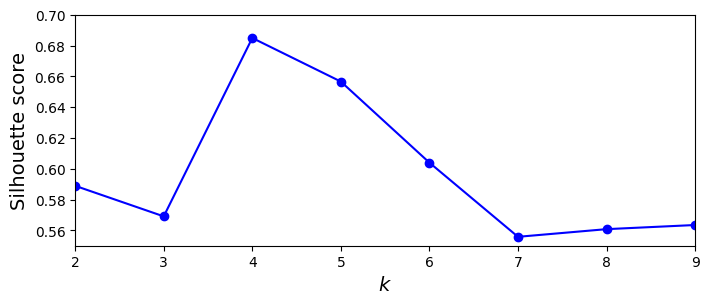

In [34]:
plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.axis([2, 9, 0.55, 0.7])
plt.show()

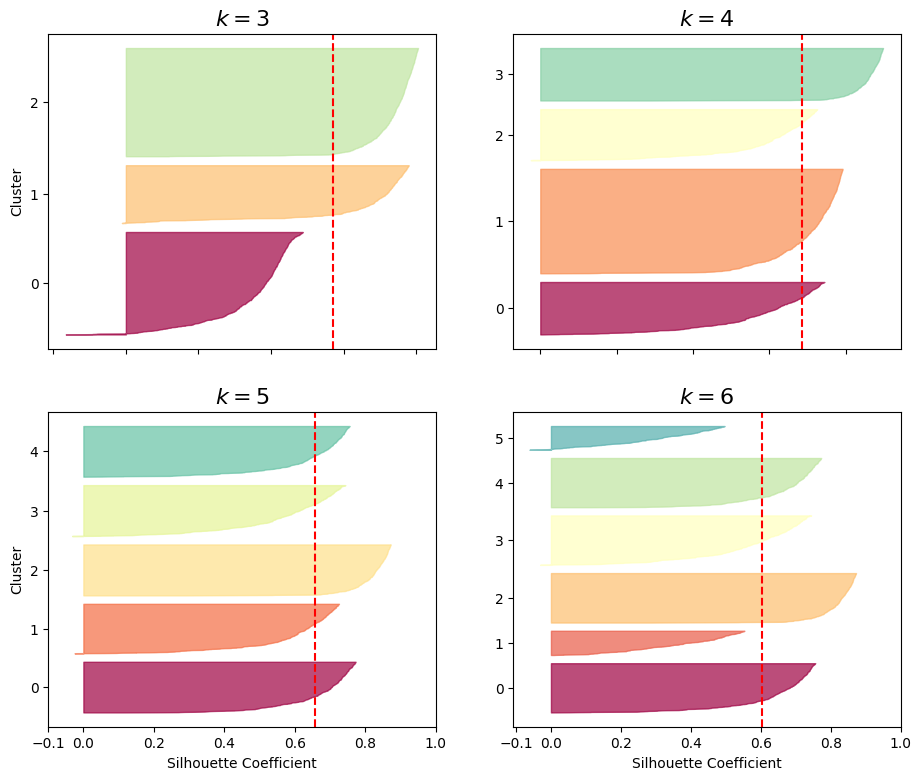

In [35]:
# 실루엣 다이어그램 생성

from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter

plt.figure(figsize=(11, 9))

for k in (3, 4, 5, 6):
    plt.subplot(2, 2, k - 2)
    
    y_pred = kmeans_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(X, y_pred)

    padding = len(X) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 5):
        plt.ylabel("Cluster")
    
    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)

plt.show()

다이어그램에서 각 클러스터별 높이는 클러스터에 속한 샘플의 수를 의미하고, 너비는 클러스터 계수를 의미한다.

실루엣 다이어그램을 통해서 k-mean알고리즘의 최적 클러스터 수를 비교해보면 모든 클러스터가 평균 실루엣 점수를 넘는것은 k=4, 5일때라는 것을 볼 수 있다.

그리고 여기서 클러스터별로 샘플의 개수 차이가 많이 나는 k=4일때보다 5개일때를 선택하는것이 더 좋은 선택이 될 수 있다.

In [144]:
# k-mean이 잘 안되는 경우

X1, y1 = make_blobs(n_samples=1000, centers=((4, -4), (0, 0)), random_state=42)
X1 = X1.dot(np.array([[0.374, 0.95], [0.732, 0.598]]))
X2, y2 = make_blobs(n_samples=250, centers=1, random_state=42)
X2 = X2 + [6, -8]
X = np.r_[X1, X2]
y = np.r_[y1, y2]

In [145]:
kmeans_good = KMeans(n_clusters=3, n_init=1, random_state=42)
kmeans_bad = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans_good.fit(X)
kmeans_bad.fit(X)

KMeans(n_clusters=3, n_init=10, random_state=42)

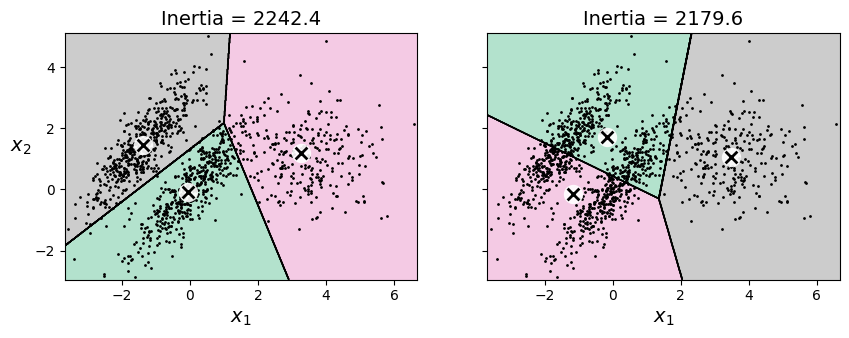

In [146]:
plt.figure(figsize=(10, 3.2))

plt.subplot(121)
plot_decision_boundaries(kmeans_good, X)
plt.title("Inertia = {:.1f}".format(kmeans_good.inertia_), fontsize=14)

plt.subplot(122)
plot_decision_boundaries(kmeans_bad, X, show_ylabels=False)
plt.title("Inertia = {:.1f}".format(kmeans_bad.inertia_), fontsize=14)

plt.show()

이렇게 타원형의 형태의 데이터 분포를 가지면 오히려 초기에 랜덤하게 지정한 샘플이 더 클러스터를 잘 구분하였다.

In [39]:
# 군집을 활용한 이미지 분할

images_path = os.path.join(".", "images", "unsupervised_learning")
os.makedirs(images_path, exist_ok=True)
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/rickiepark/handson-ml2/master/"
filename = "ladybug.png"
print("Downloading", filename)
url = DOWNLOAD_ROOT + "images/unsupervised_learning/" + filename
urllib.request.urlretrieve(url, os.path.join(images_path, filename))

('.\\images\\unsupervised_learning\\ladybug.png',
 <http.client.HTTPMessage at 0x20c4c4f5790>)

In [40]:
from matplotlib.image import imread

image = imread(os.path.join(images_path, filename))
image.shape

(533, 800, 3)

In [41]:
X = image.reshape(-1, 3)
kmeans = KMeans(n_clusters=8, random_state=42, n_init=10).fit(X)
segmented_img = kmeans.cluster_centers_[kmeans.labels_]
segmented_img = segmented_img.reshape(image.shape)

In [42]:
segmented_imgs = []
n_colors = (10, 8, 6, 4, 2)
for n_clusters in n_colors:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10).fit(X)
    segmented_img = kmeans.cluster_centers_[kmeans.labels_]
    segmented_imgs.append(segmented_img.reshape(image.shape))

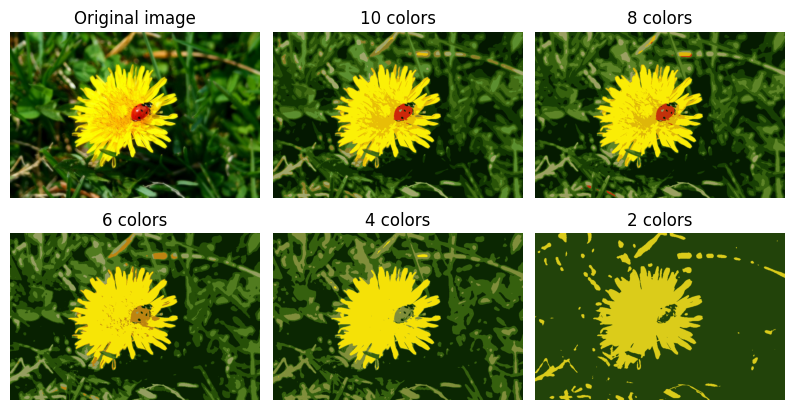

In [43]:
plt.figure(figsize=(10,5))
plt.subplots_adjust(wspace=0.05, hspace=0.1)

plt.subplot(231)
plt.imshow(image)
plt.title("Original image")
plt.axis('off')

for idx, n_clusters in enumerate(n_colors):
    plt.subplot(232 + idx)
    plt.imshow(segmented_imgs[idx])
    plt.title("{} colors".format(n_clusters))
    plt.axis('off')

plt.show()

In [44]:
# load_digits데이터를 이용해 군집을 사용한 전처리

from sklearn.datasets import load_digits
from sklearn.linear_model import LogisticRegression


X_digits, y_digits = load_digits(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits, random_state=42)

log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(X_train, y_train)
log_reg_score = log_reg.score(X_test, y_test)
log_reg_score

0.9688888888888889

In [45]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ("kmeans", KMeans(n_clusters=50, random_state=42, n_init=10)),
    ("log_reg", LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)),
])
pipeline.fit(X_train, y_train)
pipeline_score = pipeline.score(X_test, y_test)
pipeline_score

0.9733333333333334

로지스틱 회귀 모델로 load_digits을 학습 하였을 때는 96.9%의 정확도가 나왔다.

전처리 단계를 사용하여 훈련 세트를 50개의 클러스터로 모아 이미지를 각 클러스터까지의 거리로 바꾼 뒤 로지스틱을 적용하였다.

이렇게 하면 load_digits는 8*8차원의 데이터에서 50차원의 데이터로 차원 축소하게 된다.

그 결과 97.3%로 정확도가 올라간것을 볼 수 있다.

In [46]:
# 그리드 탐색을 통해 최적의 클러스터 수 구하기

from sklearn.model_selection import GridSearchCV

param_grid = dict(kmeans__n_clusters=range(2, 100))
grid_clf = GridSearchCV(pipeline, param_grid, cv=3, verbose=2)
grid_clf.fit(X_train, y_train)

Fitting 3 folds for each of 98 candidates, totalling 294 fits
[CV] END ...............................kmeans__n_clusters=2; total time=   0.0s
[CV] END ...............................kmeans__n_clusters=2; total time=   0.0s
[CV] END ...............................kmeans__n_clusters=2; total time=   0.0s
[CV] END ...............................kmeans__n_clusters=3; total time=   0.0s
[CV] END ...............................kmeans__n_clusters=3; total time=   0.0s
[CV] END ...............................kmeans__n_clusters=3; total time=   0.0s
[CV] END ...............................kmeans__n_clusters=4; total time=   0.0s
[CV] END ...............................kmeans__n_clusters=4; total time=   0.0s
[CV] END ...............................kmeans__n_clusters=4; total time=   0.0s
[CV] END ...............................kmeans__n_clusters=5; total time=   0.0s
[CV] END ...............................kmeans__n_clusters=5; total time=   0.0s
[CV] END ...............................kmeans_

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('kmeans',
                                        KMeans(n_clusters=50, n_init=10,
                                               random_state=42)),
                                       ('log_reg',
                                        LogisticRegression(max_iter=5000,
                                                           multi_class='ovr',
                                                           random_state=42))]),
             param_grid={'kmeans__n_clusters': range(2, 100)}, verbose=2)

In [47]:
grid_clf.best_params_

{'kmeans__n_clusters': 79}

In [48]:
grid_clf.score(X_test, y_test)

0.9822222222222222

클러스터의 개수가 79 개일때 정확도가 98%로 가장 크게 나왔다.

In [50]:
# 군집을 이용한 준지도 학습

sample = 50
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", random_state=42)
log_reg.fit(X_train[:sample], y_train[:sample])
log_reg.score(X_test, y_test)

0.8333333333333334

준지도 학습의 경우 레이블이 달려있는 샘플의 수가 적어서 해당 레이블만 가지고 하면 위와같이 낮은 정확도의 결과만 얻을 수 있다.

따라서 위의 결과에 레이블이 없는 샘플을 군집화를 통해 학습하면 된다.

먼저 각 클러스터별로 대표 이미지를 뽑아서 해당 이미지의 레이블값을 직접 입력한다.

그러면 이미지들이 클러스터를 대표하는 이미지이기 때문에 더 향상된 결과를 얻을 수 있게 된다.

In [53]:
k = 50
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
X_digits_dist = kmeans.fit_transform(X_train)
representative_digit_idx = np.argmin(X_digits_dist, axis=0)
X_representative_digits = X_train[representative_digit_idx]

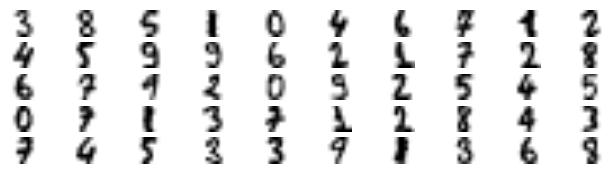

In [54]:
plt.figure(figsize=(8, 2))
for index, X_representative_digit in enumerate(X_representative_digits):
    plt.subplot(k // 10, 10, index + 1)
    plt.imshow(X_representative_digit.reshape(8, 8), cmap="binary", interpolation="bilinear")
    plt.axis('off')

plt.show()

In [55]:
y_representative_digits = np.array([3, 8, 5, 1, 0, 4, 6, 7, 1, 2, 4, 5, 9, 9, 6, 2, 1, 7, 2, 8, 6, 7,
       9, 2, 0, 9, 2, 5, 4, 5, 0, 7, 1, 3, 7, 1, 2, 8, 4, 3, 7, 4, 5, 3,
       3, 9, 1, 3, 6, 8])

In [56]:
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(X_representative_digits, y_representative_digits)
log_reg.score(X_test, y_test)

0.9022222222222223

90%까지 성능이 향산된것을 볼 수 있다.

이때 레이블 전파를 사용해서 동일한 클러스터에 있는 모든 샘플에 해당 레이블을 전파하면 성능을 더 높일 수 있다.

In [91]:
y_train_propagated = np.empty(len(X_train), dtype=np.int32)
for i in range(k):
    y_train_propagated[kmeans.labels_==i] = y_representative_digits[i]
    
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(X_train, y_train_propagated)
log_reg.score(X_test, y_test)

0.9288888888888889

정확도가 93%로 더 오른것을 볼 수 있다.

하지만 모든 클러스터 안의 데이터에 전파를 할 경우 같은 클러스터 안에 있지만 잘못된 데이터에 다른 레이블을 부여할 수 있기 때문에 중심에 가까운 샘플만 레이블 전파를 하는것이 더 좋다.

In [102]:
# 클러스터 중심에 가까운 20%의 샘플만 레이블 전파

percentile_closest = 20

X_cluster_dist = X_digits_dist[np.arange(len(X_train)), kmeans.labels_]
for i in range(k):
    in_cluster = (kmeans.labels_ == i)
    cluster_dist = X_cluster_dist[in_cluster]
    cutoff_distance = np.percentile(cluster_dist, percentile_closest)
    above_cutoff = (X_cluster_dist > cutoff_distance)
    X_cluster_dist[in_cluster & above_cutoff] = -1
    
partially_propagated = (X_cluster_dist != -1)
X_train_partially_propagated = X_train[partially_propagated]
y_train_partially_propagated = y_train_propagated[partially_propagated]
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(X_train_partially_propagated, y_train_partially_propagated)
log_reg.score(X_test, y_test)

0.9244444444444444

비지도 학습을 통해 지정한 레이블은 실제 레이블과 98%이상 같음을 볼 수 있다.

In [103]:
np.mean(y_train_partially_propagated == y_train[partially_propagated])

0.9826388888888888

In [104]:
# make_moons데이터를 DBSCAN으로 군집화 하기

from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN

X, y = make_moons(n_samples=1000, noise=0.05, random_state=42)
dbscan = DBSCAN(eps=0.05, min_samples=5)
dbscan.fit(X)

DBSCAN(eps=0.05)

In [105]:
# 핵심 샘플의 수

len(dbscan.core_sample_indices_)

808

In [106]:
np.unique(dbscan.labels_)

array([-1,  0,  1,  2,  3,  4,  5,  6], dtype=int64)

label이 -1로 분류된것은 클러스터링 된 데이터중에서 잡음에 해당하는 데이터들이다.

make_moons데이터의 경우 2개의 클러스터를 가져야 하는데 7개가 나와서 너무 많은 클러스터를 가지고 있음을 알 수 있다.

따라서 엡실론 값을 조정해서 적절한 클러스터를 가지도록 만들어야한다.

In [107]:
dbscan2 = DBSCAN(eps=0.2)
dbscan2.fit(X)
np.unique(dbscan2.labels_)

array([0, 1], dtype=int64)

In [108]:
def plot_dbscan(dbscan, X, size, show_xlabels=True, show_ylabels=True):
    core_mask = np.zeros_like(dbscan.labels_, dtype=bool)
    core_mask[dbscan.core_sample_indices_] = True
    anomalies_mask = dbscan.labels_ == -1
    non_core_mask = ~(core_mask | anomalies_mask)

    cores = dbscan.components_
    anomalies = X[anomalies_mask]
    non_cores = X[non_core_mask]
    
    plt.scatter(cores[:, 0], cores[:, 1], c=dbscan.labels_[core_mask], marker='o', s=size, cmap="Paired")
    plt.scatter(cores[:, 0], cores[:, 1], marker='*', s=20, c=dbscan.labels_[core_mask])
    plt.scatter(anomalies[:, 0], anomalies[:, 1], c="r", marker=".", s=100)
    
    # 이상치 빨간색 점으로 표시
    plt.scatter(non_cores[:, 0], non_cores[:, 1], c=dbscan.labels_[non_core_mask], marker=".")
    
    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)
    plt.title("eps={:.2f}, min_samples={}".format(dbscan.eps, dbscan.min_samples), fontsize=14)

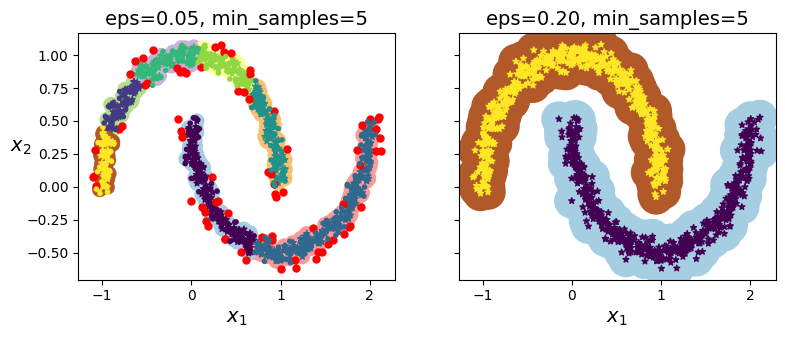

In [109]:
plt.figure(figsize=(9, 3.2))

plt.subplot(121)
plot_dbscan(dbscan, X, size=100)

plt.subplot(122)
plot_dbscan(dbscan2, X, size=600, show_ylabels=False)

plt.show()

왼쪽의 경우 같은 클러스터를 7개의 클러스터가 나눠서 분할하여 적합하지 않은 모양이 나왔다.

반면 오른쪽의 경우 엡실론값이 적당하게 커서 잘 분류된것을 볼 수 있다.

In [110]:
dbscan = dbscan2

DBSCAN의 경우 새로운 샘플에 대해 클러스터를 예측할 수 없다.

따라서 다른 알고리즘을 예측기로 사용하여 새로운 샘플이 어떤 클러스터에 속하는지 분류해야한다.

In [111]:
# k-nn 알고리즘을 DBSCAN의 예측기로 사용

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(dbscan.components_, dbscan.labels_[dbscan.core_sample_indices_])

KNeighborsClassifier(n_neighbors=50)

In [112]:
# 새로운 샘플 예측

X_new = np.array([[-0.5, 0], [0, 0.5], [1, -0.1], [2, 1]])
knn.predict(X_new)

array([1, 0, 1, 0], dtype=int64)

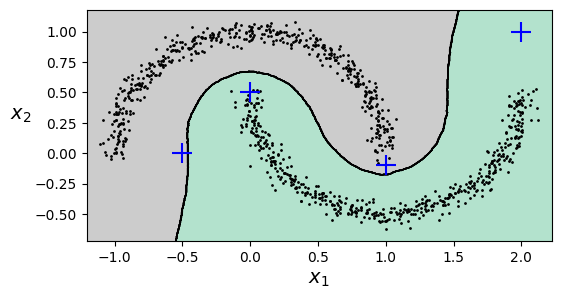

In [113]:
plt.figure(figsize=(6, 3))
plot_decision_boundaries(knn, X, show_centroids=False)
plt.scatter(X_new[:, 0], X_new[:, 1], c="b", marker="+", s=200, zorder=10)
plt.show()

### 스펙트럼 군집

스펙트럼 군집은 데이터의 유사성을 고려하여 데이터 클러스터화한다.

이는 비선형 데이터 분포를 탐지하고, 밀도가 다른 클러스터를 구분하기 좋아서 복잡한 클러스터 구조를 파악하는 데 유용하다.

In [116]:
from sklearn.cluster import SpectralClustering

sc1 = SpectralClustering(n_clusters=2, gamma=100, random_state=42)
sc1.fit(X)

sc2 = SpectralClustering(n_clusters=2, gamma=1, random_state=42)
sc2.fit(X)

SpectralClustering(gamma=1, n_clusters=2, random_state=42)

In [131]:
def plot_spectral_clustering(sc, X, size, alpha, show_xlabels=True, show_ylabels=True):
    plt.scatter(X[:, 0], X[:, 1], marker='o', s=size, c='gray', alpha=alpha)
    plt.scatter(X[:, 0], X[:, 1], marker='o', s=30, c='w')
    plt.scatter(X[:, 0], X[:, 1], marker='.', s=10, c=sc.labels_, cmap="Paired")
    
    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)
    plt.title("RBF gamma={}".format(sc.gamma), fontsize=14)

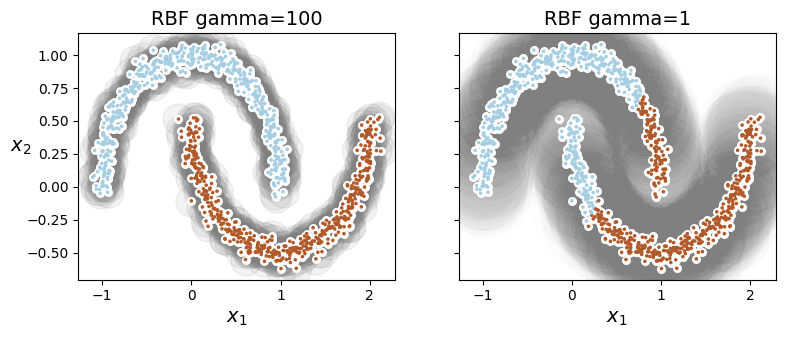

In [132]:
plt.figure(figsize=(9, 3.2))

plt.subplot(121)
plot_spectral_clustering(sc1, X, size=500, alpha=0.1)

plt.subplot(122)
plot_spectral_clustering(sc2, X, size=4000, alpha=0.01, show_ylabels=False)

plt.show()


In [183]:
# 가우시안 혼합

X1, y1 = make_blobs(n_samples=1000, centers=((4, -4), (0, 0)), random_state=42)
X1 = X1.dot(np.array([[0.374, 0.95], [0.732, 0.598]]))
X2, y2 = make_blobs(n_samples=250, centers=1, random_state=42)
X2 = X2 + [6, -8]
X = np.r_[X1, X2]
y = np.r_[y1, y2]

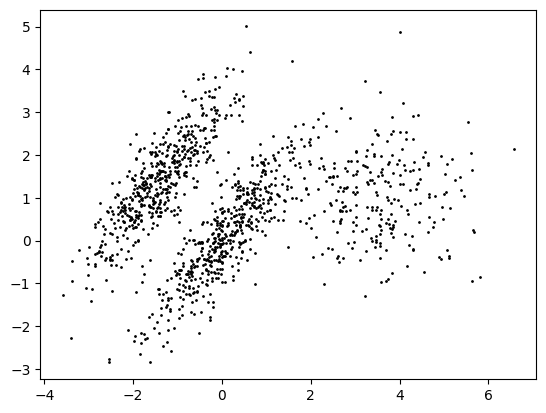

In [184]:
plot_data(X)

In [187]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=3, n_init=10, random_state=42)
gm.fit(X)

GaussianMixture(n_components=3, n_init=10, random_state=42)

가우시안 혼합은 EM알고리즘을 통해 클러스터의 중심과 분산 그리고 가중치 값을 계산하였다.

In [191]:
gm.weights_

array([0.40005972, 0.20961444, 0.39032584])

In [192]:
gm.means_

array([[-1.40764129,  1.42712848],
       [ 3.39947665,  1.05931088],
       [ 0.05145113,  0.07534576]])

In [193]:
gm.covariances_

array([[[ 0.63478217,  0.72970097],
        [ 0.72970097,  1.16094925]],

       [[ 1.14740131, -0.03271106],
        [-0.03271106,  0.95498333]],

       [[ 0.68825143,  0.79617956],
        [ 0.79617956,  1.21242183]]])

가우시안 혼합 모델은 생성 모델이기 때문에 학습 결과를 바탕으로 새로운 샘플을 만들어 낼 수 있다.

In [194]:
# 새로운 샘플 생성

X_new, y_new = gm.sample(6)
X_new

array([[-2.32491052,  1.04752548],
       [-1.16654983,  1.62795173],
       [ 1.84860618,  2.07374016],
       [ 3.98304484,  1.49869936],
       [ 3.8163406 ,  0.53038367],
       [ 0.38079484, -0.56239369]])

In [195]:
y_new

array([0, 0, 1, 1, 1, 2])

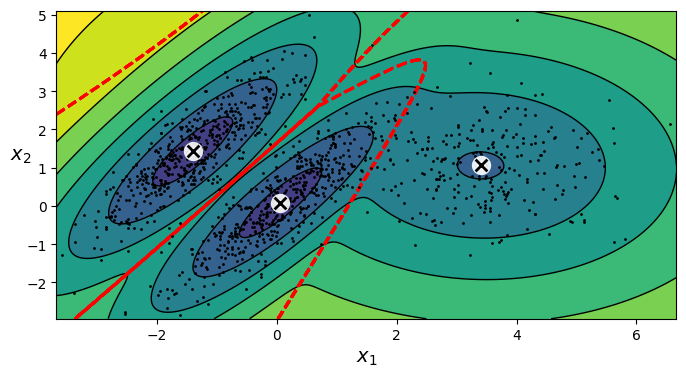

In [198]:
# 가우시안 혼합 모델 결정경계 및 등고선 시각화

from matplotlib.colors import LogNorm

def plot_gaussian_mixture(clusterer, X, resolution=1000, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = -clusterer.score_samples(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z,
                 norm=LogNorm(vmin=1.0, vmax=30.0),
                 levels=np.logspace(0, 2, 12))
    plt.contour(xx, yy, Z,
                norm=LogNorm(vmin=1.0, vmax=30.0),
                levels=np.logspace(0, 2, 12),
                linewidths=1, colors='k')

    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z,
                linewidths=2, colors='r', linestyles='dashed')
    
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)
    plot_centroids(clusterer.means_, clusterer.weights_)

    plt.xlabel("$x_1$", fontsize=14)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)
        
plt.figure(figsize=(8, 4))
plot_gaussian_mixture(gm, X)
plt.show()

가우시안 혼합 알고지름을 밀도가 낮은 지역에 있는 샘플을 이상치로 판단하여 이상치 탐지에 사용할 수 있다.

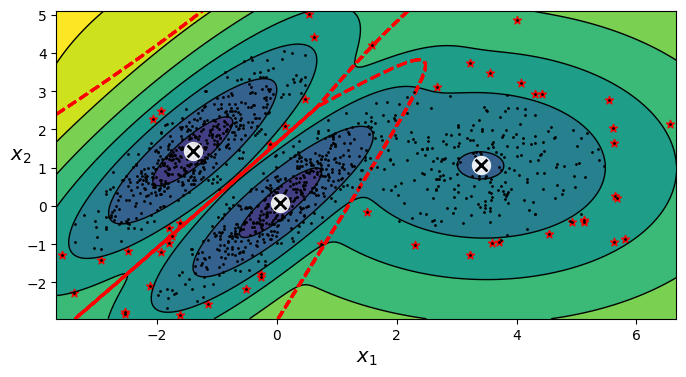

In [201]:
# 데이터 이상치 탐지

densities = gm.score_samples(X)
density_threshold = np.percentile(densities, 4)
anomalies = X[densities < density_threshold]
plt.figure(figsize=(8, 4))
plot_gaussian_mixture(gm, X)
plt.scatter(anomalies[:, 0], anomalies[:, 1], color='r', marker='*')
plt.ylim(top=5.1)
plt.show()

적절한 클러스터의 수를 정할 때 가우시안 혼합 모델은 타원형의 클러스터를 가지고 있어 원형 클러스터를 가정하는 이너셔나 실루엣 점수는 사용할 수 없다.

대신 BIC나 AIC를 통해 이론적 정보 기준을 최소화하는 모델을 찾을 수 있다.

${BIC} = {\log(m)p - 2\log({\hat L})}$

${AIC} = 2p - 2\log(\hat L)$

BIC와 AIC는 클러스터가 많은 모델에게 벌칙을 가하고 데이터를 잘 학습하는 모델에는 보상을 가한다.

둘의 선택이 다른 경우는 일반적으로 BIC모델이 더 간단하지만, 데이터에 잘 맞지는 않을 수 있다.

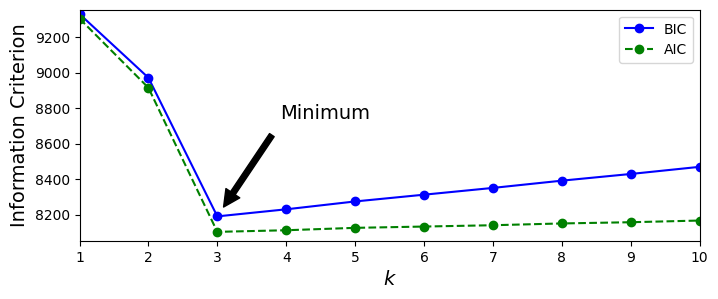

In [206]:
gms_per_k = [GaussianMixture(n_components=k, n_init=10, random_state=42).fit(X) for k in range(1, 11)]
bics = [model.bic(X) for model in gms_per_k]
aics = [model.aic(X) for model in gms_per_k]

plt.figure(figsize=(8, 3))
plt.plot(range(1, 11), bics, "bo-", label="BIC")
plt.plot(range(1, 11), aics, "go--", label="AIC")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Information Criterion", fontsize=14)
plt.axis([1, 10, np.min(aics) - 50, np.max(aics) + 50])
plt.annotate('Minimum',
             xy=(3, bics[2]),
             xytext=(0.35, 0.6),
             textcoords='figure fraction',
             fontsize=14,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.legend()
plt.show()

최적의 클러스터 개수를 수동으로 찾는 대신 배이즈 가우시안 혼합 모델을 사용할 수 있다.

이는 불필요한 클러스터의 가중치를 0으로 만드는 방법으로 클러스터 수를 사전에 지정하지 않고도 데이터를 통해 적절한 클러스터 수를 추정한다.

In [207]:
from sklearn.mixture import BayesianGaussianMixture

bgm = BayesianGaussianMixture(n_components=10, n_init=10, random_state=42)
bgm.fit(X)
np.round(bgm.weights_, 2)

array([0.4 , 0.21, 0.  , 0.4 , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ])

알고리즘을 통해 자동으로 10개의 컴포넌트 중에서 3개가 필요하다는 것을 찾았다.

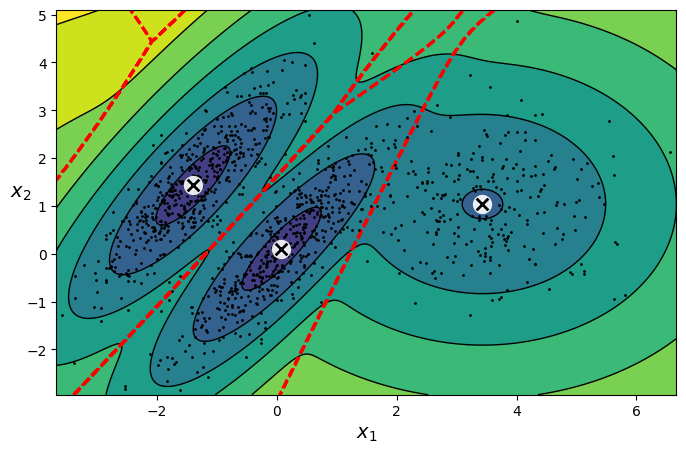

In [208]:
plt.figure(figsize=(8, 5))
plot_gaussian_mixture(bgm, X)
plt.show()

In [209]:
# 타원형이 아닌 데이터로 가우시안 혼합 모델

X_moons, y_moons = make_moons(n_samples=1000, noise=0.05, random_state=42)
bgm = BayesianGaussianMixture(n_components=10, n_init=10, random_state=42)
bgm.fit(X_moons)

C:\Users\leedo\anaconda3\envs\hands_on_ml\lib\site-packages\sklearn\mixture\_base.py:268: ConvergenceWarning: Initialization 10 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(


BayesianGaussianMixture(n_components=10, n_init=10, random_state=42)

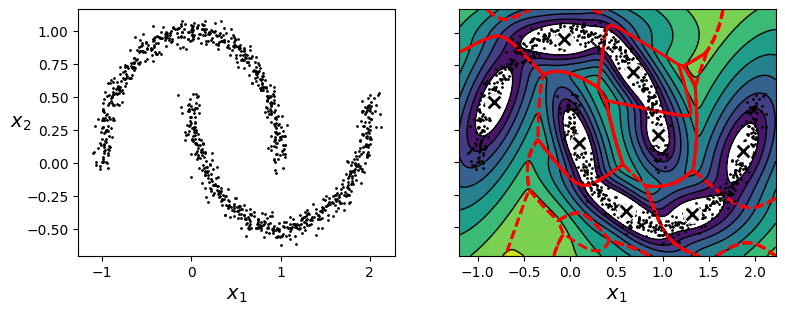

In [210]:
plt.figure(figsize=(9, 3.2))

plt.subplot(121)
plot_data(X_moons)
plt.xlabel("$x_1$", fontsize=14)
plt.ylabel("$x_2$", fontsize=14, rotation=0)

plt.subplot(122)
plot_gaussian_mixture(bgm, X_moons, show_ylabels=False)

plt.show()

In [219]:
# 가능도 함수

from scipy.stats import norm

xx = np.linspace(-6, 4, 101)
ss = np.linspace(1, 2, 101)
XX, SS = np.meshgrid(xx, ss)
ZZ = 2 * norm.pdf(XX - 1.0, 0, SS) + norm.pdf(XX + 4.0, 0, SS) # 중심이 -4, 1인 가우시안 분포 혼합모델
ZZ = ZZ / ZZ.sum(axis=1)[:,np.newaxis] / (xx[1] - xx[0])

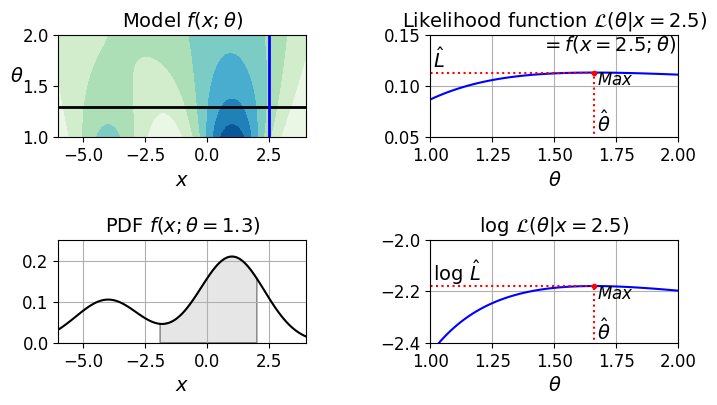

In [239]:
from matplotlib.patches import Polygon

plt.figure(figsize=(8, 4))

x_idx = 85
s_idx = 30

plt.subplots_adjust(wspace=0.5, hspace=1)

plt.subplot(221)
plt.contourf(XX, SS, ZZ, cmap="GnBu")
plt.plot([-6, 4], [ss[s_idx], ss[s_idx]], "k-", linewidth=2)
plt.plot([xx[x_idx], xx[x_idx]], [1, 2], "b-", linewidth=2)
plt.xlabel(r"$x$")
plt.ylabel(r"$\theta$", fontsize=14, rotation=0)
plt.title(r"Model $f(x; \theta)$", fontsize=14)

plt.subplot(222)
plt.plot(ss, ZZ[:, x_idx], "b-")
max_idx = np.argmax(ZZ[:, x_idx])
max_val = np.max(ZZ[:, x_idx])
plt.plot(ss[max_idx], max_val, "r.")
plt.plot([ss[max_idx], ss[max_idx]], [0, max_val], "r:")
plt.plot([0, ss[max_idx]], [max_val, max_val], "r:")
plt.text(1.01, max_val + 0.005, r"$\hat{L}$", fontsize=14)
plt.text(ss[max_idx]+ 0.01, 0.055, r"$\hat{\theta}$", fontsize=14)
plt.text(ss[max_idx]+ 0.01, max_val - 0.012, r"$Max$", fontsize=12)
plt.axis([1, 2, 0.05, 0.15])
plt.xlabel(r"$\theta$", fontsize=14)
plt.grid(True)
plt.text(1.99, 0.135, r"$=f(x=2.5; \theta)$", fontsize=14, ha="right")
plt.title(r"Likelihood function $\mathcal{L}(\theta|x=2.5)$", fontsize=14)

plt.subplot(223)
plt.plot(xx, ZZ[s_idx], "k-")
plt.axis([-6, 4, 0, 0.25])
plt.xlabel(r"$x$", fontsize=14)
plt.grid(True)
plt.title(r"PDF $f(x; \theta=1.3)$", fontsize=14)
verts = [(xx[41], 0)] + list(zip(xx[41:81], ZZ[s_idx, 41:81])) + [(xx[80], 0)]
poly = Polygon(verts, facecolor='0.9', edgecolor='0.5')
plt.gca().add_patch(poly)

plt.subplot(224)
plt.plot(ss, np.log(ZZ[:, x_idx]), "b-")
max_idx = np.argmax(np.log(ZZ[:, x_idx]))
max_val = np.max(np.log(ZZ[:, x_idx]))
plt.plot(ss[max_idx], max_val, "r.")
plt.plot([ss[max_idx], ss[max_idx]], [-5, max_val], "r:")
plt.plot([0, ss[max_idx]], [max_val, max_val], "r:")
plt.axis([1, 2, -2.4, -2])
plt.xlabel(r"$\theta$", fontsize=14)
plt.text(ss[max_idx]+ 0.01, max_val - 0.05, r"$Max$", fontsize=12)
plt.text(ss[max_idx]+ 0.01, -2.39, r"$\hat{\theta}$", fontsize=14)
plt.text(1.01, max_val + 0.02, r"$\log \, \hat{L}$", fontsize=14)
plt.grid(True)
plt.title(r"$\log \, \mathcal{L}(\theta|x=2.5)$", fontsize=14)

plt.show()

모델이 있을 때 확률분포를 예측하려면 왼쪽 아래와 같이 $\theta$값에 따라 확률밀도 함수를 얻어 만족하는 범위를 적분해주면 된다.

하지만 $\theta$값을 모르고 특정 샘플을 관찰했다면 오른쪽 위와 같이 가능도 함수를 얻게 된다.